In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import random
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler 


# Generate synthetic data for demonstration
random_seed = 42
# Define the desired sample size for each category
num_samples_per_category = 50000

# Generate data with labels for each category
data = {
    'Platelet_Count': [],
    'Cirrhosis_Label': []
}

# Generate 500 samples for each category
for cirrhosis_label in [0, 1, 2]:
    for _ in range(num_samples_per_category):
        # For healthy samples (label 0), platelet count is within the healthy range
        if cirrhosis_label == 0:
            platelet_count = random.randint(150000, 450000)
        # For cirrhosis samples (label 1), platelet count is between 50,000 and 149,999
        elif cirrhosis_label == 1:
            platelet_count = random.randint(50000, 149999)
        # For severe cirrhosis samples (label 2), platelet count is below 50,000
        else:
            platelet_count = random.randint(1, 49999)
        
        # Append the data to the lists
        data['Platelet_Count'].append(platelet_count)
        data['Cirrhosis_Label'].append(cirrhosis_label)

# Create a DataFrame from the synthetic data
df = pd.DataFrame(data)

# Separate the feature (Xi) and the target variable (Wi)
X = df[['Platelet_Count']]
y = df['Cirrhosis_Label']
y_encoded = to_categorical(y, num_classes=3)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [29]:
from tensorflow.keras.utils import to_categorical

# Create a simple neural network model
model = keras.Sequential([
    layers.Input(shape=(1,)),  # Input layer
    layers.Dense(128, activation='relu'),  # Hidden layer with 128 units and ReLU activation
    layers.Dense(64, activation='relu'),   # Hidden layer with 64 units and ReLU activation
    layers.Dense(y_train.shape[1], activation='softmax')  # Output layer with 3 units and softmax activation
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0533 - accuracy: 0.9826 - val_loss: 0.0144 - val_accuracy: 0.9950
Epoch 2/10
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0147 - accuracy: 0.9944 - val_loss: 0.0091 - val_accuracy: 0.9992
Epoch 3/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0116 - accuracy: 0.9953 - val_loss: 0.0139 - val_accuracy: 0.9931
Epoch 4/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0110 - accuracy: 0.9954 - val_loss: 0.0118 - val_accuracy: 0.9947
Epoch 5/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0098 - accuracy: 0.9957 - val_loss: 0.0079 - val_accuracy: 0.9971
Epoch 6/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0091 - accuracy: 0.9962 - val_loss: 0.0056 - val_accuracy: 0.9978
Epoch 7/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0090 - accuracy: 0.9963 - val_loss: 0.0093 - val_accuracy:

In [30]:
print(df)

        Platelet_Count  Cirrhosis_Label
0               433928                0
1               367475                0
2               200158                0
3               335815                0
4               267465                0
...                ...              ...
149995           10355                2
149996           32281                2
149997           24211                2
149998           45149                2
149999           43749                2

[150000 rows x 2 columns]


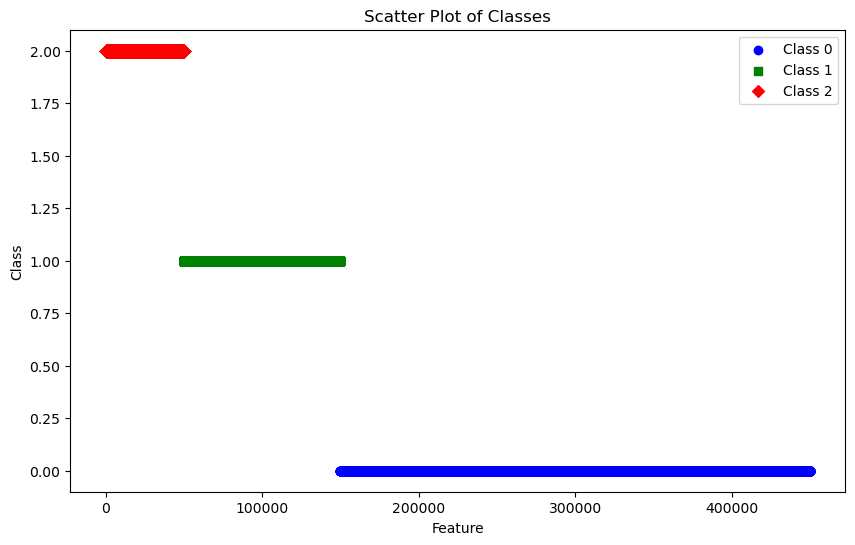

In [31]:

# Separate the dataset into classes based on the target column
classes = df['Cirrhosis_Label'].unique()

# Create a scatter plot for each class
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Define colors and markers for each class
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['o', 's', 'D', '^', 'v', '<', '>']

for i, class_label in enumerate(classes):
    class_data = df[df['Cirrhosis_Label'] == class_label]
    plt.scatter(class_data['Platelet_Count'], [i] * len(class_data), c=colors[i % len(colors)],
                marker=markers[i % len(markers)], label=f'Class {class_label}')

# Customize plot labels and legend
plt.xlabel('Feature')
plt.ylabel('Class')
plt.title('Scatter Plot of Classes')
plt.legend(loc='upper right')

# Show the plot
plt.show()

In [48]:
# Make predictions on new data
new_data = np.array([[240000]])  # Replace with your own data points
new_data = scaler.transform(new_data)  # Standardize the new data, assuming you used StandardScaler

# Predict the class probabilities for the new data
class_probabilities = model.predict(new_data)

# To get the predicted class labels (argmax of class probabilities)
predicted_labels = np.argmax(class_probabilities, axis=1)

# Print the predicted class labels
d = {0: "Healthy",
    1: "Liver Cirroihsis",
    2: "Severe Condition"}

print("Health:", d[predicted_labels[0]])


Health: Healthy


C:\Users\Puneet\miniconda3\envs\pro\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
